In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st
plt.style.use(['classic'])

In [2]:
# Read in Revenue Files
file_2010 = "../../datasets/subsets/inst_ex/inst_ex_2010.csv"

inst_2010 = pd.read_csv(file_2010)
inst_2010 = inst_2010.set_index(['STNAME'])
inst_2010

,2010_E11,2010_E12,2010_E13,2010_E14,2010_E15,2010_E16,2010_E17,2010_E18,2010_E11A,2010_E11B,2010_E11C,2010_E11D,2010_E2
STNAME,,,,,,,,,,,,,
alabama,2527833534,998529795,104085015,1853069.0,3.959470e+05,258190506,5451356,11889250.0,1.792845e+09,1.882740e+08,110278708.0,2.483750e+07,16553537.0
alaska,641431359,384228399,59288785,108520.0,1.974290e+05,59980844,13023961,10549173.0,NaN,NaN,NaN,NaN,NaN
arizona,3359861432,859390181,206437720,10873343.0,2.877747e+07,187008767,128741211,135885169.0,2.084843e+09,3.341313e+08,66336523.0,1.166767e+08,71375105.0
arkansas,1757604021,479523820,90422003,12001037.0,7.316257e+06,214753424,45831168,18506817.0,1.141047e+09,1.828722e+08,86305441.0,1.530539e+08,25140497.0
california,23503106187,7756666360,1679025181,748356725.0,3.951384e+08,1365473021,26828100,3808507.0,1.713808e+10,2.809219e+09,130419485.0,7.784903e+08,316585759.0
colorado,3059053410,724107986,110502483,42116539.0,9.699904e+06,274122107,64290163,59574416.0,2.151622e+09,3.566132e+08,87514203.0,1.082682e+08,54033013.0
connecticut,3544680769,1371504932,204105857,364609254.0,6.678461e+07,126809130,45669776,7226164.0,2.283623e+09,3.892087e+08,42420860.0,1.303501e+08,NaN
delaware,607857133,265699807,14029383,6474801.0,6.374394e+07,48807224,2670322,9691939.0,3.771244e+08,1.147619e+08,17015297.0,2.901153e+07,8112869.0
district of columbia,458470012,60639939,13029947,166575039.0,NaN,18708260,10932490,5732696.0,3.272236e+08,5.507024e+07,4284889.0,1.953801e+07,111616709.0


In [3]:
(inst_2010.sum(axis=1)/1000000000).sort_values(ascending = False).head(5)

STNAME
new york        57.470853
california      56.651194
texas           25.998734
illinois        25.424667
pennsylvania    25.392264
dtype: float64

In [4]:
summary_2010 = pd.DataFrame(inst_2010.sum(axis=1)/100000000, columns=['Total InstructionalEx ($100M)'])
summary_2010['InstructionalEx ($100M)'] = inst_2010.iloc[:,0:8].sum(axis=1)/100000000
summary_2010['Teacher Salaries ($100M)'] = inst_2010.iloc[:,8:13].sum(axis=1)/100000000
summary_2010

,Total InstructionalEx ($100M),InstructionalEx ($100M),Teacher Salaries ($100M)
STNAME,,,
alabama,60.410172,39.082285,21.327888
alaska,11.688085,11.688085,0.000000
arizona,75.903382,49.169753,26.733629
arkansas,42.143773,26.259585,15.884187
california,566.511942,354.784025,211.727917
colorado,71.015178,43.434670,27.580508
connecticut,85.769932,57.313905,28.456027
delaware,15.650005,10.189746,5.460259
district of columbia,12.518218,7.340884,5.177334


In [5]:
summary_pct = pd.DataFrame(summary_2010['InstructionalEx ($100M)'] / summary_2010['Total InstructionalEx ($100M)'] *100, columns = ['Instructional (%)'])
summary_pct['Teacher Salaries (%)'] = summary_2010['Teacher Salaries ($100M)'] / summary_2010['Total InstructionalEx ($100M)'] *100
summary_pct

,Instructional (%),Teacher Salaries (%)
STNAME,,
alabama,64.694874,35.305126
alaska,100.000000,0.000000
arizona,64.779397,35.220603
arkansas,62.309527,37.690473
california,62.626045,37.373955
colorado,61.162516,38.837484
connecticut,66.822841,33.177159
delaware,65.110174,34.889826
district of columbia,58.641604,41.358396


In [6]:
# Load in Dropout Rates
dropout_path = "../../datasets/subsets/success/success_df_2010.csv"

success_2010 = pd.read_csv(dropout_path)
success_2010

,STNAME,2010_DRP912,2010_DRP9,2010_DRP10,2010_DRP11,2010_DRP12,2010_DRPAM,2010_DRPAS,2010_DRPHI,2010_DRPBL,2010_DRPWH
0,alabama,1.799999,1.400000,2.000000,2.099998,1.799999,1.299999,1.400000,0.900000,2.000000,1.599999
1,alaska,6.899998,4.000000,5.500000,9.299995,8.699997,11.599998,3.500000,6.099998,6.399998,5.099998
2,arizona,7.799999,5.099998,5.699997,7.000000,13.599998,14.599998,4.899998,8.099998,8.799995,6.799999
3,arkansas,3.599998,1.900000,3.199999,4.399998,5.299999,4.899998,1.400000,4.099998,5.000000,3.099998
4,california,4.599998,2.599998,3.099998,4.199997,8.899994,6.500000,1.799999,5.799999,8.399994,2.799999
5,colorado,5.299999,3.099998,3.699999,5.299999,9.699997,10.099998,2.400000,9.899994,8.599998,3.199999
6,connecticut,3.000000,2.799999,2.599998,3.400000,3.199999,3.000000,1.099999,6.899998,6.799999,1.400000
7,delaware,3.900000,4.699997,3.699999,3.400000,3.500000,10.299995,3.199999,4.699997,4.899998,3.099998
8,district of columbia,7.000000,8.099998,5.899998,4.199997,4.000000,NaN,5.399998,8.299995,6.899998,4.899998
9,florida,2.299999,1.900000,2.199999,2.400000,2.799999,2.699999,0.800000,2.799999,3.500000,1.599999


In [7]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_pct['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    
summary_pct

C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
alabama,64.694874,35.305126,1.8
alaska,100.000000,0.000000,6.9
arizona,64.779397,35.220603,7.8
arkansas,62.309527,37.690473,3.6
california,62.626045,37.373955,4.6
colorado,61.162516,38.837484,5.3
connecticut,66.822841,33.177159,3
delaware,65.110174,34.889826,3.9
district of columbia,58.641604,41.358396,7


In [8]:
summary_pct.sort_values(by=['Dropout Rate'], ascending = False)

,Instructional (%),Teacher Salaries (%),Dropout Rate
STNAME,,,
arizona,64.779397,35.220603,7.8
mississippi,62.024154,37.975846,7.4
district of columbia,58.641604,41.358396,7
alaska,100.000000,0.000000,6.9
new mexico,61.690570,38.309430,6.9
wyoming,63.179201,36.820799,6
colorado,61.162516,38.837484,5.3
hawaii,66.857039,33.142961,5.2
louisiana,62.576065,37.423935,4.8


In [9]:
summary_2010['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_2010['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    

summary_2010 = summary_2010[summary_2010['Dropout Rate'].notna()]
summary_2010['Dropout Rate'] = summary_2010['Dropout Rate'].astype(float)
summary_2010.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Total InstructionalEx ($100M)  51 non-null     float64
 1   InstructionalEx ($100M)        51 non-null     float64
 2   Teacher Salaries ($100M)       51 non-null     float64
 3   Dropout Rate                   51 non-null     float64
dtypes: float64(4)
memory usage: 2.0+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
summary_pct['Dropout Rate'] = ''

for i in range(len(success_2010)):
    summary_pct['Dropout Rate'][i] = success_2010['2010_DRP912'][i].astype(float)
    

summary_pct = summary_pct[summary_pct['Dropout Rate'].notna()]
summary_pct['Dropout Rate'] = summary_pct['Dropout Rate'].astype(float)
summary_pct.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, alabama to wyoming
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Instructional (%)     51 non-null     float64
 1   Teacher Salaries (%)  51 non-null     float64
 2   Dropout Rate          51 non-null     float64
dtypes: float64(3)
memory usage: 1.6+ KB


C:\Users\clewe\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


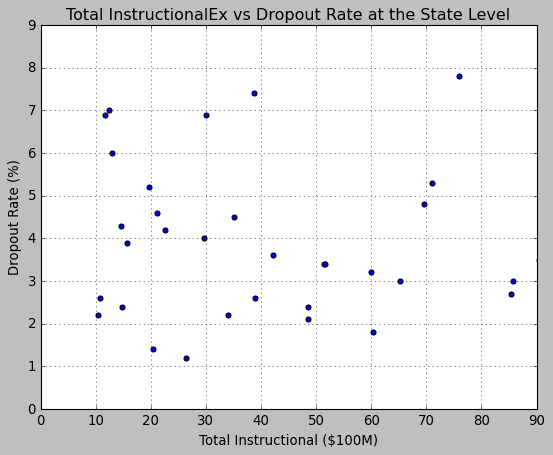

In [11]:
# Total Revenue and Dropout Rate
plt.scatter(summary_2010['Total InstructionalEx ($100M)'], summary_2010['Dropout Rate'])
plt.xlabel('Total Instructional ($100M)')
plt.xlim(left = 0, right = 90)
plt.ylabel('Dropout Rate (%)')
plt.title("Total InstructionalEx vs Dropout Rate at the State Level")
plt.grid()

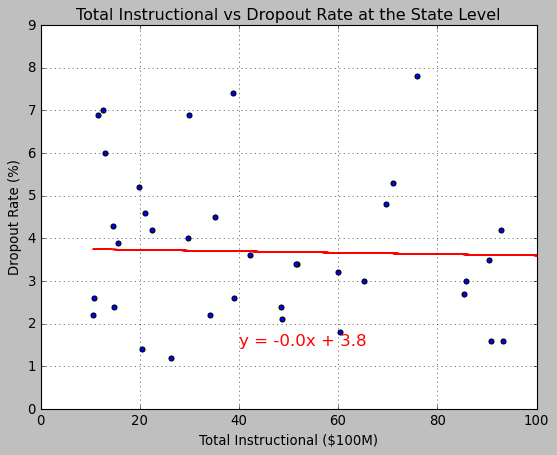

The correlation between both factors is -0.1199


In [12]:
# Total Instructional vs Dropout Rate
x_values = summary_2010['Total InstructionalEx ($100M)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Total Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Total Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

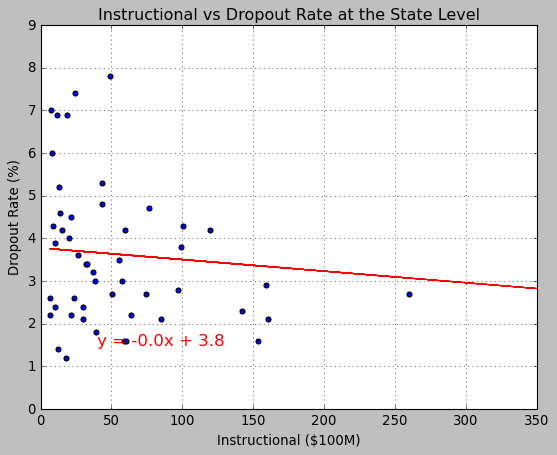

The correlation between both factors is -0.1293


In [13]:
# Total Instructional vs Dropout Rate
x_values = summary_2010['InstructionalEx ($100M)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Instructional ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 350)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

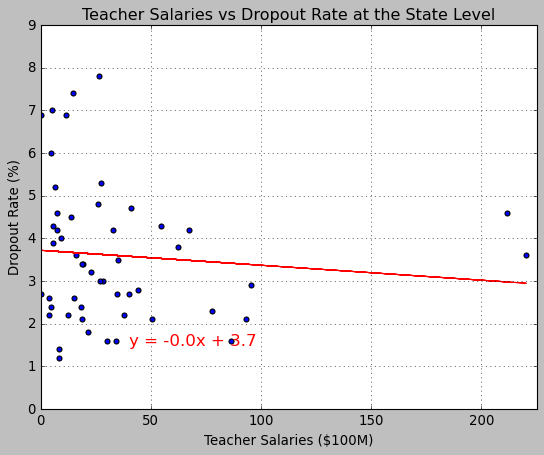

The correlation between both factors is -0.0944


In [14]:
# Teacher Salaries vs Dropout Rate
x_values = summary_2010['Teacher Salaries ($100M)']
y_values = summary_2010['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries ($100M)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 225)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

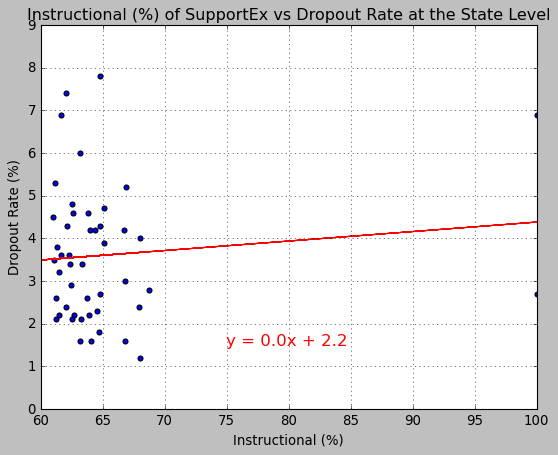

The correlation between both factors is 0.1029


In [15]:
# Instructional (%) vs Dropout Rate
x_values = summary_pct['Instructional (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(75,1.5),fontsize=15,color="red")
plt.xlabel('Instructional (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Instructional (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 60, right = 100)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")

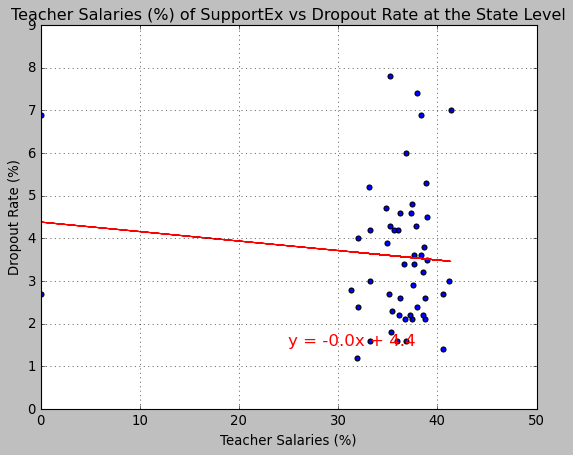

The correlation between both factors is -0.1029


In [16]:
# Teacher Salaries (%) vs Dropout Rate
x_values = summary_pct['Teacher Salaries (%)']
y_values = summary_pct['Dropout Rate'].dropna()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,1))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,1.5),fontsize=15,color="red")
plt.xlabel('Teacher Salaries (%)')
plt.ylabel('Dropout Rate (%)')
plt.title('Teacher Salaries (%) of SupportEx vs Dropout Rate at the State Level')
plt.xlim(left = 0, right = 50)
plt.grid()
plt.show()
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],4)}")